# Name analysis
### Contents:
+ Looking through extracted PubName and PersonName objects from the sample of 50 reviews
+ Experimenting with spaCy's NER model

In [1]:
import sys
sys.path.append('../')

In [2]:
from application.name_obj_classes import PubName, PersonName

In [3]:
from application.review_obj_class import ReviewObj

In [4]:
import pandas as pd
import os

In [5]:
# loading in files
directory = "../../aps_reviews_50/aps_reviews/"
filenames = os.listdir(directory)
txts = []
for file in filenames:
    with open(directory + file) as f:
        txts.append(f.read())

In [6]:
review_list = []
for filename, txt in zip([x.split('.')[0] for x in filenames], txts):
    review_list.append(ReviewObj(filename, txt))

In [8]:
for x in review_list:
    print(x.pub_names)

['Cassell & Co.', 'E. P. Dutton & Co.', 'Thomas Y. Crowell & Co.', 'American Historical Society', 'Dunlap Society']
[]
[]
[]
[]
['Filtlh Co']
['KnRR & Co', 'PUBLrISHIING Co', 'American Geographical Society', 'B. LIPizxcoTr & Co', 'B. LpnIrrcorr & Co.']
[]
[]
[]
[]
[]
[]
[]
['Blakiston Co', 'Robert Clarke Co', 'Graphic Company']
['Century Co.', 'Slead & Co.', 'B. Lippincott Co.', 'Macmillan Co.', 'Maemillall Co.']
['Sou & Co.']
['Macmillan & Co.', 'Mifflin & Co.']
[]
[]
[]
[]
[]
['B. Lippincott Co.', 'Macmillan & Co.', 'Friend Society']
['Master House', 'Master House']
[]
[]
['Funk and Wagnails Company', 'Outing Publishing Company', 'Open Court Pubpishing Co', 'Sheet Metal Publishing Company']
['Macmillan & Co.']
[]
[]
['Shakespearean Society.', 'E. P. Dutton & Co.', 'Maynard & Co.']
['Macmillan & Co.']
[]
['William Wood Company', 'Treat Co', 'Lea Brothers Co']
['Wm Wood Co Publishers']
[]
[]
[]
['The Macmillan Co.', 'E. P. Dutton & Co.']
[]
['CroweU & Co.', 'Browning Society']
[]
[]
[]

In [9]:
review_df = pd.DataFrame()

In [10]:
review_df['aps_id'] = [x.review_id for x in review_list]

In [11]:
review_df['cleaned_text'] = [x.cleaned_text for x in review_list]

In [12]:
review_df['cleaned_toks'] = [x.cleaned_toks for x in review_list]

In [13]:
review_df['pubs'] = [x.pub_names for x in review_list]

In [14]:
review_df['people'] = [x.person_names for x in review_list]

In [15]:
review_df.head()

,aps_id,cleaned_text,cleaned_toks,pubs,people
0,136726613,LITERARY NOTES. - The Chautauqua department o...,"[LITERARY, NOTES, ., -, The, Chautauqua, depar...","[Cassell & Co., E. P. Dutton & Co., Thomas Y. ...","[Mr. Charles Dudley Warner, Mr. Vedder, Profes..."
1,90142613,THE GADFLY.* DEARTH of good novels has been fe...,"[THE, GADFLY, ., *, DEARTH, of, good, novels, ...",[],[Mr. E. L. Voynich]
2,90390665,TWO READABLE NOVELS.* Miss HowAiD ' Is u' W st...,"[TWO, READABLE, NOVELS, ., *, Miss, HowAiD, ',...",[],"[Miss HowAiD, Mrs. A. L. Wister, Princess Merc..."
3,124486140,Tinl OF OF ISlPAIHAiN have long enjoyed a as o...,"[Tinl, OF, OF, ISlPAIHAiN, have, long, enjoyed...",[],[Dr. Atwood]
4,126315326,Cadet's HIa(ldbook. A Manual for Military Stud...,"[Cadet, 's, HIa, (, ldbook, ., A, Manual, for,...",[],[]


## Graphing the data

In [16]:
import matplotlib.pyplot as plt

In [17]:
len(review_df.pubs[0])

5

In [18]:
review_df['pub_count'] = review_df.pubs.map(len)
review_df['person_count'] = review_df.people.map(len)

In [19]:
review_df.head()

,aps_id,cleaned_text,cleaned_toks,pubs,people,pub_count,person_count
0,136726613,LITERARY NOTES. - The Chautauqua department o...,"[LITERARY, NOTES, ., -, The, Chautauqua, depar...","[Cassell & Co., E. P. Dutton & Co., Thomas Y. ...","[Mr. Charles Dudley Warner, Mr. Vedder, Profes...",5,17
1,90142613,THE GADFLY.* DEARTH of good novels has been fe...,"[THE, GADFLY, ., *, DEARTH, of, good, novels, ...",[],[Mr. E. L. Voynich],0,1
2,90390665,TWO READABLE NOVELS.* Miss HowAiD ' Is u' W st...,"[TWO, READABLE, NOVELS, ., *, Miss, HowAiD, ',...",[],"[Miss HowAiD, Mrs. A. L. Wister, Princess Merc...",0,8
3,124486140,Tinl OF OF ISlPAIHAiN have long enjoyed a as o...,"[Tinl, OF, OF, ISlPAIHAiN, have, long, enjoyed...",[],[Dr. Atwood],0,1
4,126315326,Cadet's HIa(ldbook. A Manual for Military Stud...,"[Cadet, 's, HIa, (, ldbook, ., A, Manual, for,...",[],[],0,0


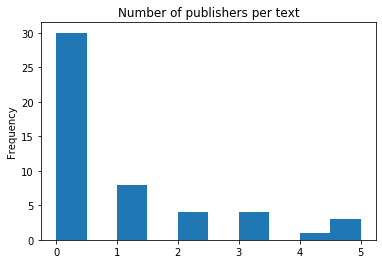

In [20]:
review_df.pub_count.plot(kind='hist', title='Number of publishers per text')

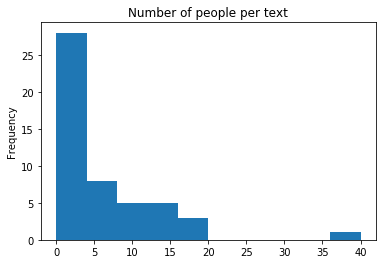

In [21]:
review_df.person_count.plot(kind='hist', title='Number of people per text')

In [22]:
review_df[review_df.person_count > 10].person_count

0     17
6     15
9     12
17    12
23    15
31    18
41    12
46    40
49    19
Name: person_count, dtype: int64

In [23]:
review_df[review_df.person_count > 10].people.map(set).map(list).map(len)

0     17
6     13
9     12
17     9
23    14
31    12
41     7
46    11
49    15
Name: people, dtype: int64

In [24]:
entity_df = pd.DataFrame()

In [25]:
ents = []
types = []
aps_ids = []

for e, l in enumerate(review_df.pubs):
    for item in l:
        ents.append(item)
        types.append('pub')
        aps_ids.append(review_df.aps_id[e])
        
for e, l in enumerate(review_df.people):
    for item in l:
        ents.append(item)
        types.append('person')
        aps_ids.append(review_df.aps_id[e])

In [26]:
entity_df['entity'] = ents
entity_df['type'] = types
entity_df['aps_id'] = aps_ids

In [27]:
entity_df.head()

,entity,type,aps_id
0,Cassell & Co.,pub,136726613
1,E. P. Dutton & Co.,pub,136726613
2,Thomas Y. Crowell & Co.,pub,136726613
3,American Historical Society,pub,136726613
4,Dunlap Society,pub,136726613


In [28]:
grouped1 = entity_df.groupby('aps_id').type.value_counts()

In [29]:
grouped1

aps_id     type  
124189638  person     4
124190789  person     5
           pub        5
124196531  person     7
124217248  person    15
                     ..
90313218   person    12
90390665   person     8
90554411   person     2
           pub        2
90967694   person     2
Name: type, Length: 61, dtype: int64

In [30]:
entity_df.type.value_counts()

person    281
pub        47
Name: type, dtype: int64

In [31]:
grouped2 = entity_df.groupby('type').entity.value_counts()

In [32]:
grouped2

type    entity                 
person  Miss Barton                29
        Dr Heitzmann                7
        Mr. Rees                    5
        Dean Farrar                 4
        Dr. Lemoine                 4
                                   ..
pub     The Macmillan Company       1
        Thomas Y. Crowell & Co.     1
        Treat Co                    1
        William Wood Company        1
        Wm Wood Co Publishers       1
Name: entity, Length: 239, dtype: int64

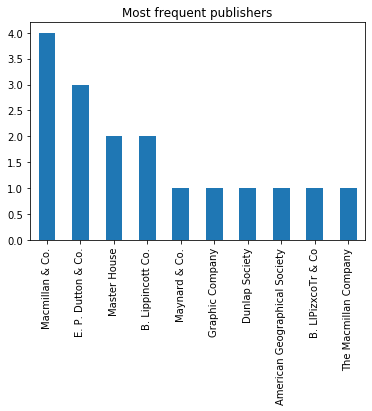

In [33]:
entity_df[entity_df.type == 'pub'].entity.value_counts()[:10].plot(kind='bar', title='Most frequent publishers')

## Training spaCy's NER Model?
### Refer to:
+ https://spacy.io/usage/training#annotations
+ https://spacy.io/usage/training#example-train-ner

In [34]:
# here's the example training data from spacy's site
# i'm adding this here so i can compare formatting
TRAIN_DATA = [
        ("Uber blew through $1 million a week", {"entities": [(0, 4, "ORG")]}),
        ("Google rebrands its business apps", {"entities": [(0, 6, "ORG")]})]

In [35]:
def get_entities(ReviewObj):
    entities = []
    for per in ReviewObj.person_names:
        entities.append((per.review_loc[0], per.review_loc[1], "PER_NAME"))
    for pub in ReviewObj.pub_names:
        entities.append((pub.review_loc[0], pub.review_loc[1], "PUB_NAME"))
    return entities

In [36]:
for x in review_list[:5]:
    ents = get_entities(x)
    print(ents)

[(95, 120, 'PER_NAME'), (190, 200, 'PER_NAME'), (395, 419, 'PER_NAME'), (660, 673, 'PER_NAME'), (819, 832, 'PER_NAME'), (837, 848, 'PER_NAME'), (1348, 1363, 'PER_NAME'), (1620, 1640, 'PER_NAME'), (1766, 1785, 'PER_NAME'), (3707, 3718, 'PER_NAME'), (4010, 4029, 'PER_NAME'), (4149, 4174, 'PER_NAME'), (4958, 4978, 'PER_NAME'), (5237, 5280, 'PER_NAME'), (5306, 5326, 'PER_NAME'), (5416, 5427, 'PER_NAME'), (5429, 5439, 'PER_NAME'), (292, 305, 'PUB_NAME'), (578, 596, 'PUB_NAME'), (3467, 3490, 'PUB_NAME'), (3850, 3877, 'PUB_NAME'), (4875, 4889, 'PUB_NAME')]
[(111, 128, 'PER_NAME')]
[(22, 33, 'PER_NAME'), (689, 706, 'PER_NAME'), (3171, 3188, 'PER_NAME'), (4054, 4064, 'PER_NAME'), (4449, 4459, 'PER_NAME'), (4643, 4657, 'PER_NAME'), (6441, 6451, 'PER_NAME'), (6496, 6515, 'PER_NAME')]
[(1320, 1330, 'PER_NAME')]
[]


In [37]:
def make_train_data(review_obj_list):
    train_data = []
    for rev in review_obj_list:
        train_data.append((rev.cleaned_text, {"entities": get_entities(rev)}))
    return train_data

In [38]:
train_data = make_train_data(review_list)

In [39]:
# stealing spacy's example

from __future__ import unicode_literals, print_function

import plac
import random
from pathlib import Path
import spacy
from spacy.util import minibatch, compounding


@plac.annotations(
    model=("Model name. Defaults to blank 'en' model.", "option", "m", str),
    output_dir=("Optional output directory", "option", "o", Path),
    n_iter=("Number of training iterations", "option", "n", int),
)

def main(model=None, output_dir=None, n_iter=100):
    """Load the model, set up the pipeline and train the entity recognizer."""
    if model is not None:
        nlp = spacy.load(model)  # load existing spaCy model
        print("Loaded model '%s'" % model)
    else:
        nlp = spacy.blank("en")  # create blank Language class
        print("Created blank 'en' model")

    # create the built-in pipeline components and add them to the pipeline
    # nlp.create_pipe works for built-ins that are registered with spaCy
    if "ner" not in nlp.pipe_names:
        ner = nlp.create_pipe("ner")
        nlp.add_pipe(ner, last=True)
    # otherwise, get it so we can add labels
    else:
        ner = nlp.get_pipe("ner")

    # add labels
    for _, annotations in TRAIN_DATA:
        for ent in annotations.get("entities"):
            ner.add_label(ent[2])

    # get names of other pipes to disable them during training
    pipe_exceptions = ["ner", "trf_wordpiecer", "trf_tok2vec"]
    other_pipes = [pipe for pipe in nlp.pipe_names if pipe not in pipe_exceptions]
    with nlp.disable_pipes(*other_pipes):  # only train NER
        # reset and initialize the weights randomly – but only if we're
        # training a new model
        if model is None:
            nlp.begin_training()
        for itn in range(n_iter):
            random.shuffle(TRAIN_DATA)
            losses = {}
            # batch up the examples using spaCy's minibatch
            batches = minibatch(train_data, size=compounding(4.0, 32.0, 1.001))
            for batch in batches:
                texts, annotations = zip(*batch)
                nlp.update(
                    texts,  # batch of texts
                    annotations,  # batch of annotations
                    drop=0.5,  # dropout - make it harder to memorise data
                    losses=losses,
                )
            print("Losses", losses)

    # test the trained model
    for text, _ in TRAIN_DATA:
        doc = nlp(text)
        print("Entities", [(ent.text, ent.label_) for ent in doc.ents])
        print("Tokens", [(t.text, t.ent_type_, t.ent_iob) for t in doc])

    # save model to output directory
    if output_dir is not None:
        output_dir = Path(output_dir)
        if not output_dir.exists():
            output_dir.mkdir()
        nlp.to_disk(output_dir)
        print("Saved model to", output_dir)

        # test the saved model
        print("Loading from", output_dir)
        nlp2 = spacy.load(output_dir)
        for text, _ in train_data:
            doc = nlp2(text)
            print("Entities", [(ent.text, ent.label_) for ent in doc.ents])
            print("Tokens", [(t.text, t.ent_type_, t.ent_iob) for t in doc])


if __name__ == "__main__":
    plac.call(main)

usage: ipykernel_launcher.py [-h] [-m None] [-o None] [-n 100]
ipykernel_launcher.py: error: unrecognized arguments: -f /Users/eva/Library/Jupyter/runtime/kernel-e4ff99af-550b-4a93-ab70-4a8690c3b6ff.json


SystemExit: 2

/Users/eva/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3334: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [40]:
%tb

SystemExit: 2

In [41]:
# ok, that didn't work. trying their simpler example for all NLP
nlp = spacy.blank("en")
optimizer = nlp.begin_training()
for i in range(20):
    random.shuffle(train_data)
    for text, annotations in train_data:
        nlp.update([text], [annotations], sgd=optimizer)

In [44]:
train_data[10]

('Bericht die neuere Literatur zur deutschen Landeskunde. (Bd. III, 1902 Und 1903). Von Prof. Dr. Alfred Hirchhoffund Prof. Dr. Willi Ule. v and 230 pp., Ferdinand Hirt, Breslau, i9o6. (, M. 7.50.) Bibliographies of German geographical literature and map products are of especial value to geographers, because Germany has still so much to teach the rest of the world as to the content of geography and the methods of using geographical data in books and maps. For these reasons the third volume of this report on German geographical literature in r1o2-x9O3 will be as heartily as the earlier volumes. The contents are so classified that every literary and cartographic reference is easily found. Under nearly all the titles are a few lines of descriptive or critical matter.',
 {'entities': [(92, 115, 'PER_NAME'), (122, 135, 'PER_NAME')]})

In [46]:
for text, _ in train_data[10:11]:
    doc = nlp(text)
    print("Entities", [(ent.text, ent.label_) for ent in doc.ents])
    print("Tokens", [(t.text, t.ent_type_, t.ent_iob) for t in doc])

Entities []
Tokens [('Bericht', '', 0), ('die', '', 0), ('neuere', '', 0), ('Literatur', '', 0), ('zur', '', 0), ('deutschen', '', 0), ('Landeskunde', '', 0), ('.', '', 0), ('(', '', 0), ('Bd', '', 0), ('.', '', 0), ('III', '', 0), (',', '', 0), ('1902', '', 0), ('Und', '', 0), ('1903', '', 0), (')', '', 0), ('.', '', 0), ('Von', '', 0), ('Prof.', '', 0), ('Dr.', '', 0), ('Alfred', '', 0), ('Hirchhoffund', '', 0), ('Prof.', '', 0), ('Dr.', '', 0), ('Willi', '', 0), ('Ule', '', 0), ('.', '', 0), ('v', '', 0), ('and', '', 0), ('230', '', 0), ('pp', '', 0), ('.', '', 0), (',', '', 0), ('Ferdinand', '', 0), ('Hirt', '', 0), (',', '', 0), ('Breslau', '', 0), (',', '', 0), ('i9o6', '', 0), ('.', '', 0), ('(', '', 0), (',', '', 0), ('M.', '', 0), ('7.50', '', 0), ('.', '', 0), (')', '', 0), ('Bibliographies', '', 0), ('of', '', 0), ('German', '', 0), ('geographical', '', 0), ('literature', '', 0), ('and', '', 0), ('map', '', 0), ('products', '', 0), ('are', '', 0), ('of', '', 0), ('especial',